In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [4]:
data=pd.read_csv('C:/Users/120761/Documents/PyScripts/titanic.csv',usecols=['Age','Fare','Survived'])

In [5]:
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


# Arbitary technique to Replace Nan values by arbitary values

<AxesSubplot:>

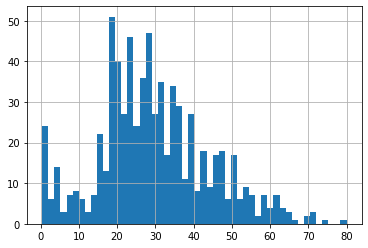

In [6]:
data['Age'].hist(bins=50)

In [7]:
 data=pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [8]:
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


# Frequent Category Imputation

In [9]:
data.shape

(1460, 4)

In [10]:
data.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [11]:
data.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

<AxesSubplot:>

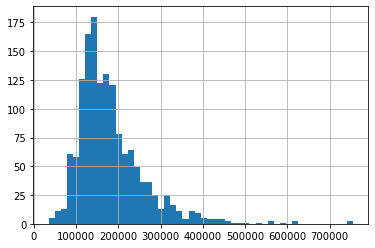

In [12]:
data['SalePrice'].hist(bins=50)

In [13]:
data.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

<AxesSubplot:>

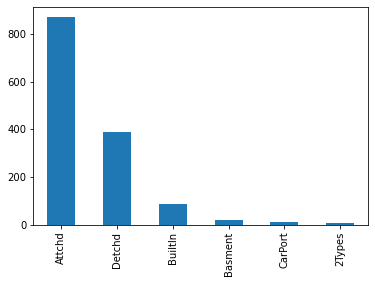

In [14]:
#counting of Values in each Columns

data['GarageType'].value_counts().plot.bar()

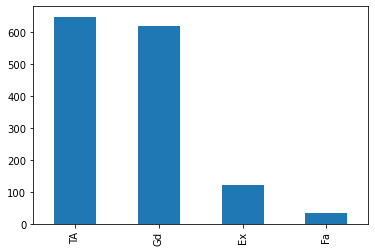

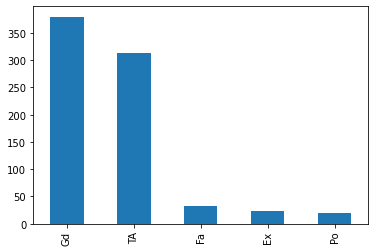

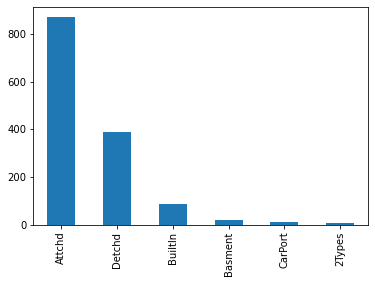

In [17]:
for features in features_with_na:
    dataset=data.copy()
    
   # dataset[features]= (dataset[features])
    dataset[features].value_counts().plot.bar()
    plt.show()
    
    


In [18]:
features_with_na=[features for features in data.columns if data[features].dtypes=='O']
features_with_na

['BsmtQual', 'FireplaceQu', 'GarageType']

In [19]:
#Replacing Missing values with count of column values
#  (variable>columns in the data)
#eg:


data['GarageType'].value_counts().index[0]

'Attchd'

In [20]:
def impute_nan(data,variable):
    most_repeated_categ=data[variable].value_counts().index[0]
    data[variable].fillna(most_repeated_categ,inplace=True)
    

In [21]:
for features in features_with_na:
    impute_nan(data,features)
    

In [25]:
data.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

# If we have more frequent repeated categories we are going to replace with new category column 

In [26]:
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [34]:
def impute_nan(data,variable):
    data[variable+"newvariable"]=np.where(data[variable].isnull(),"Missing",data[variable])

In [36]:
for features in features_with_na:
    impute_nan(data,features) 
    

In [41]:
data

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvariable,FireplaceQunewvariable,GarageTypenewvariable
0,Gd,Gd,Attchd,208500,Gd,Gd,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd
...,...,...,...,...,...,...,...
1455,Gd,TA,Attchd,175000,Gd,TA,Attchd
1456,Gd,TA,Attchd,210000,Gd,TA,Attchd
1457,TA,Gd,Attchd,266500,TA,Gd,Attchd
1458,TA,Gd,Attchd,142125,TA,Gd,Attchd


In [47]:
#now we are deleting the origonal columns of categories

data=data.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [49]:
data

,SalePrice,BsmtQualnewvariable,FireplaceQunewvariable,GarageTypenewvariable
0,208500,Gd,Gd,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
...,...,...,...,...
1455,175000,Gd,TA,Attchd
1456,210000,Gd,TA,Attchd
1457,266500,TA,Gd,Attchd
1458,142125,TA,Gd,Attchd


# ONE HOT ENCODING

In [63]:
titanic= pd.read_csv('titanic.csv',usecols=['Sex'])

In [64]:
titanic

,Sex
0,male
1,female
2,female
3,female
4,male
...,...
886,male
887,female
888,female
889,male


In [65]:
titanic.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [68]:
pd.get_dummies(titanic,drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [69]:
#another Scenario


titanic= pd.read_csv('titanic.csv',usecols=['Embarked'])
titanic.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [71]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [72]:
titanic.dropna(inplace=True)

In [73]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [75]:
pd.get_dummies(titanic,drop_first=True)

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


# One Hot Encoding with multiple Category Features

In [97]:
benz=pd.read_csv('benz.csv')
benz.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [100]:
benz=pd.read_csv('benz.csv',usecols=np.r_[2:9],)
benz.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [110]:
#finding how many no.of values in each category
#here we are taking top 10 values(repeated values) of each columns 

for i in benz.columns:
    print("values:",len(benz[i].unique()))

values: 47
values: 27
values: 44
values: 7
values: 4
values: 29
values: 12


In [117]:
benz['X1'].value_counts().sort_values(ascending=False).head(10)

aa    833
s     598
b     592
l     590
v     408
Name: X1, dtype: int64

In [138]:
lst_10=benz.X1.value_counts().sort_values(ascending=False).head(10).index

top_10=list(lst_10)

TypeError: 'list' object is not callable

# Ordinal Number Encoding

In [139]:
import datetime

In [141]:
today_date=datetime.datetime.today()
today_date

datetime.datetime(2021, 7, 2, 19, 20, 59, 408446)

In [147]:
today_date-datetime.timedelta(1)

datetime.datetime(2021, 7, 1, 19, 20, 59, 408446)

In [150]:
last_15_days=[today_date-datetime.timedelta(x) for x in range (0,15)]
last_15_days

[datetime.datetime(2021, 7, 2, 19, 20, 59, 408446),
 datetime.datetime(2021, 7, 1, 19, 20, 59, 408446),
 datetime.datetime(2021, 6, 30, 19, 20, 59, 408446),
 datetime.datetime(2021, 6, 29, 19, 20, 59, 408446),
 datetime.datetime(2021, 6, 28, 19, 20, 59, 408446),
 datetime.datetime(2021, 6, 27, 19, 20, 59, 408446),
 datetime.datetime(2021, 6, 26, 19, 20, 59, 408446),
 datetime.datetime(2021, 6, 25, 19, 20, 59, 408446),
 datetime.datetime(2021, 6, 24, 19, 20, 59, 408446),
 datetime.datetime(2021, 6, 23, 19, 20, 59, 408446),
 datetime.datetime(2021, 6, 22, 19, 20, 59, 408446),
 datetime.datetime(2021, 6, 21, 19, 20, 59, 408446),
 datetime.datetime(2021, 6, 20, 19, 20, 59, 408446),
 datetime.datetime(2021, 6, 19, 19, 20, 59, 408446),
 datetime.datetime(2021, 6, 18, 19, 20, 59, 408446)]

In [152]:
data=pd.DataFrame(last_15_days)
data.columns=['Days']

In [158]:
type(data)

pandas.core.frame.DataFrame

In [155]:
data.head()

,Days
0,2021-07-02 19:20:59.408446
1,2021-07-01 19:20:59.408446
2,2021-06-30 19:20:59.408446
3,2021-06-29 19:20:59.408446
4,2021-06-28 19:20:59.408446


In [170]:
data['weekday']=data['Days'].dt.day_name()
data

,Days,weekday
0,2021-07-02 19:20:59.408446,Friday
1,2021-07-01 19:20:59.408446,Thursday
2,2021-06-30 19:20:59.408446,Wednesday
3,2021-06-29 19:20:59.408446,Tuesday
4,2021-06-28 19:20:59.408446,Monday
5,2021-06-27 19:20:59.408446,Sunday
6,2021-06-26 19:20:59.408446,Saturday
7,2021-06-25 19:20:59.408446,Friday
8,2021-06-24 19:20:59.408446,Thursday
9,2021-06-23 19:20:59.408446,Wednesday


In [172]:
dict={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}
dict

{'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6,
 'Sunday': 7}

In [177]:
data['Week_day_num']=data['weekday'].map(dict)

#data.drop(Week_day_numdata)
data

,Days,weekday,Week_day_numdata,Week_day_num
0,2021-07-02 19:20:59.408446,Friday,5,5
1,2021-07-01 19:20:59.408446,Thursday,4,4
2,2021-06-30 19:20:59.408446,Wednesday,3,3
3,2021-06-29 19:20:59.408446,Tuesday,2,2
4,2021-06-28 19:20:59.408446,Monday,1,1
5,2021-06-27 19:20:59.408446,Sunday,7,7
6,2021-06-26 19:20:59.408446,Saturday,6,6
7,2021-06-25 19:20:59.408446,Friday,5,5
8,2021-06-24 19:20:59.408446,Thursday,4,4
9,2021-06-23 19:20:59.408446,Wednesday,3,3


# Count or Frequency Encoding

In [178]:
benz=pd.read_csv('benz.csv',usecols=np.r_[2:9],)
benz

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d
...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d
4205,j,o,t,d,d,aa,h
4206,ak,v,r,a,d,aa,g
4207,al,r,e,f,d,aa,l


In [180]:
for features in benz[:]:
    print(features ,":",len(benz[features].unique()),'label')

X0 : 47 label
X1 : 27 label
X2 : 44 label
X3 : 7 label
X4 : 4 label
X5 : 29 label
X6 : 12 label


# Target guided Ordinal Encoding 

In [185]:
titanic=pd.read_csv('titanic.csv',usecols=['Cabin','Survived'])
titanic.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [186]:
titanic['Cabin'].fillna('Missing',inplace=True)

In [187]:
titanic.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [191]:
#taking first letter of the column data

titanic['Cabin']=titanic['Cabin'].astype(str).str[0]
titanic['Cabin'].head()

0    M
1    C
2    M
3    C
4    M
Name: Cabin, dtype: object

In [192]:
titanic['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [201]:
titanic.groupby('Cabin')['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Cabin'>

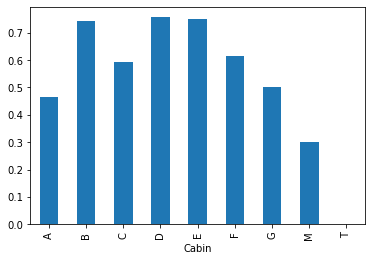

In [202]:
titanic.groupby('Cabin')['Survived'].mean().plot.bar()

In [203]:
titanic.groupby('Cabin')['Survived'].mean().sort_values().index

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [204]:
Ordinal_mapping=titanic.groupby('Cabin')['Survived'].mean().sort_values().index
Ordinal_mapping

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [207]:
#assigning Rank for the ordinary_mapping column based on the survived % whihc is in before step

ordinal_label_mapping={val:key for key,val in enumerate(Ordinal_mapping,0) }
ordinal_label_mapping

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [210]:
titanic['ordinal_label_mapping2']=titanic['Cabin'].map(ordinal_label_mapping)
titanic.head()

,Survived,Cabin,ordinal_label_mapping2
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1
